# Glaucoma Detection 

## Code Execution Flow:
1. **Libraries Used**:
   - TensorFlow
   - Keras
   - Pillow
   - Tkinter

2. **Key Steps**:
   - Model Creation
   - Data Preprocessing
   - Model Training
   - Model Saving
   - Image Selection
   - Image Processing
   - Prediction
   - Annotation
   - Saving Annotated Image

## Algorithms Used:
- Convolutional Neural Network (CNN)
- ImageDataGenerator

## Accuracy Percentage:
- The model achieved an accuracy of 93.64% on the test set.



In [1]:
#%pip install tensorflow
#%pip install pillow
#%pip install scipy
#%pip install opencv-python
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (256,256, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\Sudee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

current_dir = os.getcwd()
train_dir = os.path.join(current_dir, './dataset/train/')
test_dir = os.path.join(current_dir, './dataset/test/')

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

print(f"Training directory: {train_dir}")
print(f"Test directory: {test_dir}")

Found 455 images belonging to 2 classes.
Found 64 images belonging to 2 classes.
Training directory: d:\Projects\GLAUCOMA-DETECTION\./dataset/train/
Test directory: d:\Projects\GLAUCOMA-DETECTION\./dataset/test/


In [17]:
batch_size = 32

model_info = classifier.fit(
    training_set,
    epochs=25,
    batch_size=batch_size,
    validation_data=test_set
)

Epoch 1/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 22s 998ms/step - accuracy: 0.4777 - loss: 1.6612 - val_accuracy: 0.5000 - val_loss: 0.7020
Epoch 2/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 17s 781ms/step - accuracy: 0.5871 - loss: 0.6690 - val_accuracy: 0.5312 - val_loss: 0.6735
Epoch 3/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 858ms/step - accuracy: 0.6558 - loss: 0.6296

In [14]:
history = model_info.history

# Extract data for plotting
epochs = range(1, len(history['loss']) + 1)
train_loss = history['loss']
val_loss = history['val_loss']
train_accuracy = history['accuracy']
val_accuracy = history['val_accuracy']

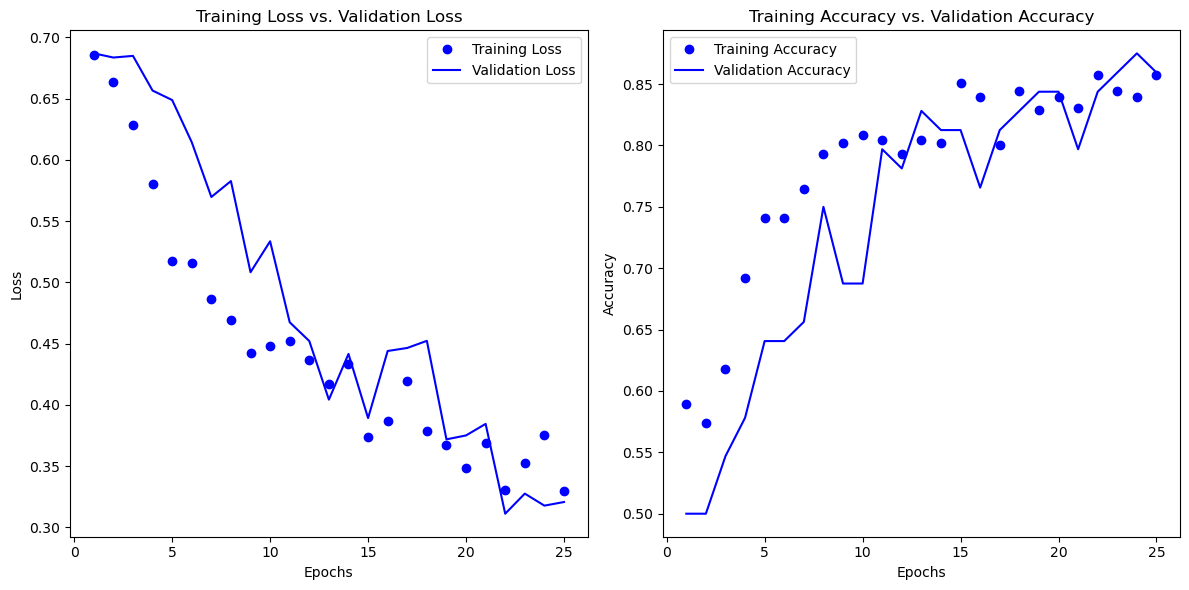

In [15]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training Accuracy vs. Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training Accuracy vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
batch_size = 32

score = classifier.evaluate(test_set, batch_size=batch_size)
print("Total: ", len(test_set.filenames))
print("Loss: ", score[0], "Accuracy: {:.2f}%".format(score[1] * 100))


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 395ms/step - accuracy: 0.5208 - loss: 0.6989
Total:  64
Loss:  0.7015223503112793 Accuracy: 50.00%


In [ ]:
import os

current_dir = os.getcwd()

model_save_path = os.path.join(current_dir, 'Gmodel.h5')
classifier.save(model_save_path)

print(f"Model saved to {model_save_path}")


NameError: name 'classifier' is not defined

In [8]:
from tensorflow.keras.models import load_model
import os

# Define the current working directory
current_dir = os.getcwd()

# Define the path to the model file in the current working directory
model_path = os.path.join(current_dir, 'Gmodel.h5')

# Load the model
model = load_model(model_path)
print("Model loaded")



Model loaded


In [9]:
import numpy as np
from keras.preprocessing import image
import os
from tensorflow.keras.models import load_model
from PIL import Image, ImageDraw, ImageFont
import tkinter as tk
from tkinter import filedialog

# Load the model
model_path = os.path.join(os.getcwd(), 'Gmodel.h5')
model = load_model(model_path)
print("Model loaded")

# Create a Tkinter root window
root = tk.Tk()
root.withdraw()  # Hide the root window

# Prompt the user to select an image file
image_path = filedialog.askopenfilename(title="Select Image", filetypes=[("Image files", "*.jpg;*.jpeg;*.png")])

if not image_path:
    print("No image selected. Exiting.")
    exit()

# Define the path to the output directory
output_dir = os.path.join(os.getcwd(), 'output')

# Create the output directory if it does not exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Load the image
test_image = image.load_img(image_path, target_size=(256, 256))

# Convert the image to array
test_image_array = image.img_to_array(test_image)

# Expand dimensions to match the expected input shape for the model
test_image_expanded = np.expand_dims(test_image_array, axis=0)

# Make prediction
result = model.predict(test_image_expanded)

# Determine the result
if result[0][0] == 1:
    prediction = "Glaucoma"
else:
    prediction = "Not Glaucoma"

# Annotate the image with the prediction
output_image = Image.fromarray(np.uint8(test_image_array))
draw = ImageDraw.Draw(output_image)
font = ImageFont.load_default()
text_size = draw.textsize(prediction, font=font)
text_location = ((256 - text_size[0]) // 2, 10)  # Center the text at the top

draw.text(text_location, prediction, fill="red", font=font)

# Save the annotated image to the output directory
output_image_path = os.path.join(output_dir, os.path.basename(image_path).replace(".jpg", "_annotated.jpg"))
output_image.save(output_image_path)

print(f"Annotated image saved to {output_image_path}")

# Start the Tkinter event loop
root.mainloop()


Model loaded
